In [1]:
#Data Pre-procesing Step  
# importing libraries  
import numpy as np
import matplotlib.pyplot as mtp  
import pandas as pd  
import plotly.express as px
import plotly.graph_objects as go
from matplotlib import pyplot as plt
  
#importing datasets  
data_set= pd.read_csv('Social_Network_Ads.csv')  
data_set

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [2]:
#Extracting Independent and dependent Variable  
x= data_set.iloc[:, [0,1]].values
y= data_set.iloc[:, 2].values

# x[0]

In [3]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  

In [4]:
#feature Scaling  
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import confusion_matrix  

In [19]:
st_x = StandardScaler()

st_model = st_x.fit(x)
x = st_model.transform(x)    

In [6]:
# x_real = np.array([34,112000]).reshape(1,2)

In [7]:
# x_real_process = st_model.transform(x_real)
# x_real_process

In [21]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  

classifier= LogisticRegression(random_state=0)
classifier.fit(x, y)

LogisticRegression(random_state=0)

In [9]:
#Predicting the test set result  
y_pred = classifier.predict(x)
# y_pred= classifier.predict_proba(x_test)

In [10]:
from joblib import dump, load

dump(classifier, 'logistic.joblib')

['logistic.joblib']

In [11]:
loaded_model = load('logistic.joblib')

In [12]:
# new_model = loaded_model.predict(x_real_process)
# new_model

In [13]:
#Creating the Confusion matrix  
cm= confusion_matrix(y,y_pred) 
cm

array([[237,  20],
       [ 44,  99]])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


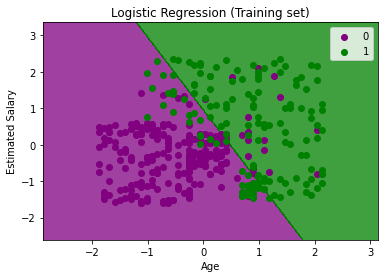

In [14]:
#Visualizing the training set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x, y  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Training set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


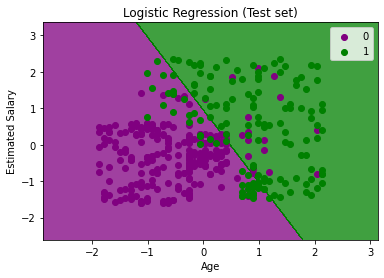

In [15]:
#Visulaizing the test set result  
from matplotlib.colors import ListedColormap  
x_set, y_set = x, y  
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step  =0.01),  
np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))  
mtp.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),  
alpha = 0.75, cmap = ListedColormap(('purple','green' )))  
mtp.xlim(x1.min(), x1.max())  
mtp.ylim(x2.min(), x2.max())  
for i, j in enumerate(np.unique(y_set)):  
    mtp.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],  
        c = ListedColormap(('purple', 'green'))(i), label = j)  
mtp.title('Logistic Regression (Test set)')  
mtp.xlabel('Age')  
mtp.ylabel('Estimated Salary')  
mtp.legend()  
mtp.show()  

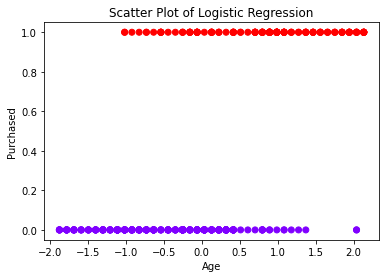

In [16]:
plt.scatter(x[:,0], y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.xlabel("Age")
plt.ylabel("Purchased")
plt.show()

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88       257
           1       0.83      0.69      0.76       143

    accuracy                           0.84       400
   macro avg       0.84      0.81      0.82       400
weighted avg       0.84      0.84      0.84       400

